## Import Statements

In [1]:
import pysptools.util as util
import pandas as pd
import matplotlib.pyplot as plt
from spectral import *
import numpy as np
import pysptools.eea as eea
import spectral.io.envi as envi
import pysptools.eea as eea
import pysptools.abundance_maps as amp
import pysptools.classification as cls
import pysptools.noise as ns
import pysptools.skl as skl
import timeit

In [2]:
im = plt.imread('methane.png')

![title](methane.png)

## Import data

In [4]:
data_file = r'C:\Users\Dr.RSK\Desktop\Hyperspectral-CNN\AlisoCanyon1\aliso1.hdr'
data, header = util.load_ENVI_file(data_file)

## Dimesnsions before Spatial Removal

In [111]:
data.shape

(5120, 512, 256)

## Ground Truth  

In [44]:
import h5py
import numpy as np

In [45]:
f = h5py.File('2016-01-26.233621.AlisoCanyonNELow.Line7-Run3-Segment01.L3-CMF.hdf5','r')

In [46]:
def keys(f):
    return [key for key in f.keys()]

In [47]:
keys(f)

['CH4', 'H2S', 'NH3']

In [48]:
CMF = f['CH4']
list(CMF.items())

[('CH4_CMF1', <HDF5 dataset "CH4_CMF1": shape (5120, 512), type "<f4">),
 ('CH4_CMF2', <HDF5 dataset "CH4_CMF2": shape (5120, 512), type "<f4">)]

In [49]:
CMF1 = f['/CH4/CH4_CMF1'].value
CMF2 = f['/CH4/CH4_CMF2'].value

In [50]:
for i in range(0,CMF2.shape[0]):
    for j in range(0,CMF2.shape[1]):
        if(CMF2[i][j]!=0.0):
            CMF2[i][j]=1

In [52]:
np.save('CMF2.npy',CMF2)

In [51]:
CMF2.shape

(5120, 512)

## Reflectance values for all pixels across all spectral bands

In [123]:
print(data)

[[[6.30456   6.47104   6.44008   ... 7.1713943 7.226754  7.367842 ]
  [6.366256  6.382112  6.322816  ... 7.3618956 7.1772556 7.524872 ]
  [6.238192  6.3524    6.441248  ... 7.329453  7.579053  7.557485 ]
  ...
  [6.20264   6.237568  6.202608  ... 7.302095  7.242063  7.3557906]
  [6.270048  6.339232  6.1888    ... 7.4885545 7.6951466 7.3430185]
  [6.319312  6.443088  6.259568  ... 7.338101  7.597749  7.507829 ]]

 [[6.173552  6.420736  6.41464   ... 7.2850213 7.2767653 7.346205 ]
  [6.210048  6.366032  6.41104   ... 7.307389  7.3564444 7.325917 ]
  [6.254368  6.328432  6.487248  ... 7.5155478 7.5258193 7.3589396]
  ...
  [6.265744  6.263936  6.270416  ... 7.3813105 7.4708467 7.3175025]
  [6.206     6.366848  6.247792  ... 7.3420134 7.5150695 7.460285 ]
  [6.319312  6.376576  6.268752  ... 7.2920804 7.500849  7.5953126]]

 [[6.173552  6.420736  6.5164    ... 7.3387737 7.4408855 7.096118 ]
  [6.341584  6.422304  6.427088  ... 7.318991  7.2245274 7.1944795]
  [6.327152  6.50416   6.525584 

## Header - Meta Data

In [124]:
print(header)

{'description': 'File imported into ENVI.', 'samples': '512', 'lines': '5120', 'bands': '256', 'header offset': '0', 'file type': 'ENVI Standard', 'data type': '4', 'interleave': 'bip', 'sensor type': 'Unknown', 'byte order': '0', 'wavelength units': 'Micrometers', 'wavelength': ['7.519890', '7.537630', '7.555470', '7.573220', '7.591070', '7.608820', '7.626670', '7.644420', '7.662280', '7.680040', '7.697900', '7.715660', '7.733530', '7.751300', '7.769170', '7.786950', '7.804830', '7.822610', '7.840390', '7.858280', '7.876070', '7.893960', '7.911750', '7.929650', '7.947440', '7.965350', '7.983150', '8.001050', '8.018860', '8.036760', '8.054570', '8.072480', '8.090290', '8.108200', '8.126020', '8.143830', '8.161740', '8.179550', '8.197460', '8.215270', '8.233190', '8.250990', '8.268900', '8.286700', '8.304610', '8.322410', '8.340300', '8.358100', '8.375990', '8.393770', '8.411650', '8.429430', '8.447200', '8.465060', '8.482820', '8.500670', '8.518420', '8.536250', '8.553980', '8.571800',

## NFINDR algorithm to detect endmember spectra of entire image 

In [125]:
def get_endmembers_nfindr(data, header):
    print('Endmembers extraction with NFINDR')
    nfindr = eea.NFINDR()
    U = nfindr.extract(data, 2, maxit=5, normalize=True, ATGP_init=True)
    nfindr.display(header, suffix='Cuprite Endmembers')
    return U

## Define Spatial Cut Functions

In [53]:
del_arr = []
del_arr_Y =[]

In [54]:
def array_cut_Y(X,Y):
    for i in range(X,Y):
        del_arr_Y.append(i)
    return del_arr_Y

In [55]:
def array_cut(X,Y):
    for i in range(X,Y):
        del_arr.append(i)
    return del_arr

## Assign data to holder variable

In [45]:
before_cut = data

## Cut along X dimension 

In [60]:
del_arr = array_cut(0,3912)

In [61]:
del_arr = array_cut(4221,5120)

In [25]:
after_cut = np.delete(before_cut,del_arr,0)

In [27]:
#im=np.delete(im,del_arr,0)

In [58]:
CMF2 = np.delete(CMF2,del_arr,0)

In [50]:
im.shape

(309, 512, 3)

In [86]:
after_cut.shape

(309, 512, 256)

In [59]:
CMF2.shape

(5120, 512)

## Cut along Y dimension 

In [51]:
del_arr_1 = array_cut_Y(270,512)

In [88]:
after_cut_1 = np.delete(after_cut,del_arr_1,1)

In [52]:
im=np.delete(im,del_arr_Y,1)

In [30]:
CMF2=np.delete(CMF2,del_arr_Y,1)

In [89]:
after_cut_1.shape

(309, 270, 256)

In [53]:
im.shape

(309, 270, 3)

In [31]:
CMF2.shape

(309, 512)

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1.0]
    G: [0.0, 1.0]
    B: [0.0, 1.0]

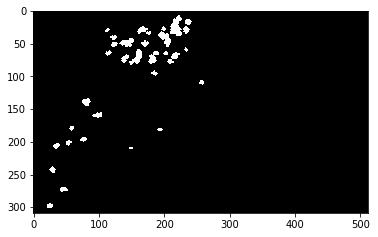

In [32]:
imshow(CMF2)

## Save array after Spatial Removal 

In [8]:
np.save('cutarray.npy',after_cut_1)

In [55]:
np.save('cutGT.npy',im)

In [33]:
np.save('GroundTruth_CMF2.npy',CMF2)